# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 8
label_name = "stat2"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 302.7962452471256
Epoch 1, Loss 226.69755548238754
Epoch 2, Loss 184.45962515473366
Epoch 3, Loss 157.9342122077942
Epoch 4, Loss 139.63774679601192
Epoch 5, Loss 126.13331086933613
Epoch 6, Loss 115.6650840640068
Epoch 7, Loss 107.25751265883446
Epoch 8, Loss 100.32463757693768
Epoch 9, Loss 94.47482244670391
Epoch 10, Loss 89.45970940589905
Epoch 11, Loss 85.09691236168146
Epoch 12, Loss 81.25730635970831
Epoch 13, Loss 77.84621697664261
Epoch 14, Loss 74.78842851519585
Epoch 15, Loss 72.02603727579117
Epoch 16, Loss 69.51424311101437
Epoch 17, Loss 67.22061388939619
Epoch 18, Loss 65.11533971875906
Epoch 19, Loss 63.17002683132887
Epoch 20, Loss 61.36988981068134
Epoch 21, Loss 59.69499485194683
Epoch 22, Loss 58.13335136324167
Epoch 23, Loss 56.671479150652885
Epoch 24, Loss 55.29933539032936
Epoch 25, Loss 54.00945835188031
Epoch 26, Loss 52.793421275913715
Epoch 27, Loss 51.64301859587431
Epoch 28, Loss 50.554633881896734
Epoch 29, Loss 49.52289170771837
Epoch 30, L

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

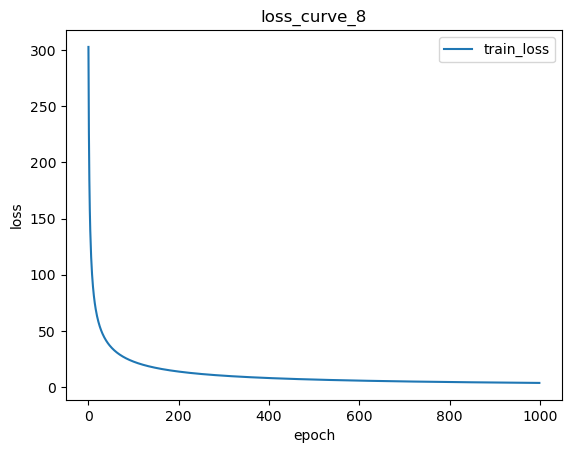

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[16101, 0], [0, 16155]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


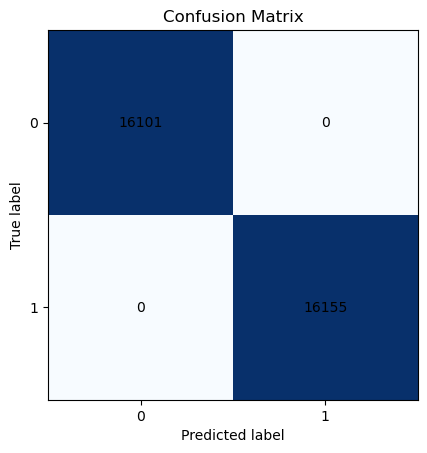

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

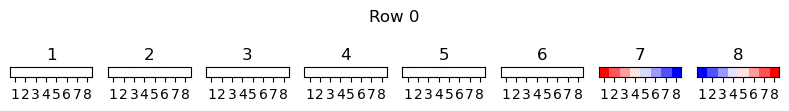

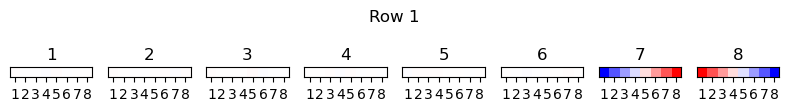

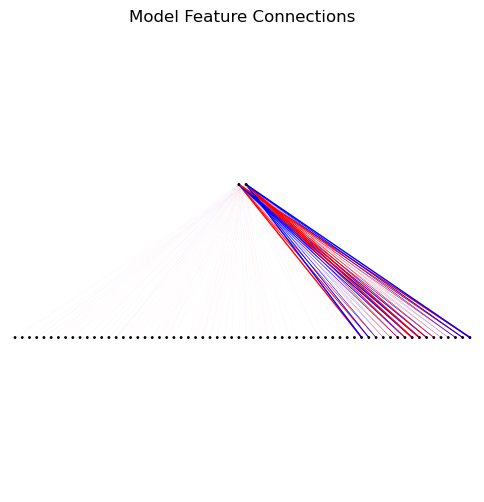

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()